In [1]:
from LogisticRegression import LogisticRegression as LR
from ClassificationTree import ClassificationTree as CT
from RandomForestForClassification import RandomForest as RF
from GradientBoostingForClassification import GradientBoosting as GB

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

#np.random.seed(1)

import os

In [2]:
#os.mkdir('t_data')
#print(os.listdir())

In [3]:
import zipfile
with zipfile.ZipFile('Titanic/Titanic.zip', 'r') as zip_obj:
    zip_obj.extractall('/t_data/')

print(os.listdir("/t_data/"))

['gender_submission.csv', 'test.csv', 'train.csv']


### Проанализируем набор данных о пассажирах Титаника и построим модель для предсказания выжил пассажир или нет.

In [4]:
data = pd.read_csv("/t_data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Anderson, Mr. Harry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#corr = data.corr()
#corr.style.background_gradient(cmap='coolwarm')


### Подготовим данные для обучения

In [8]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
categorical_features = data[['Sex']]
numerical_features = numerical_features.drop(columns=['PassengerId', 'Survived'])
numerical_features.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
numerical_features_filled_mean = numerical_features.fillna(numerical_features.mean(axis=0))

In [10]:
transf = DictVectorizer(sparse=False)
categorical_features = transf.fit_transform(categorical_features.T.to_dict().values())

In [11]:
X = np.hstack((numerical_features_filled_mean.to_numpy(), categorical_features))
y = data['Survived'].to_numpy()

In [12]:
X.shape, y.shape

((891, 7), (891,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Подготовим данные для предсказания и получения оценок на kaggle

In [16]:
test = pd.read_csv("/t_data/test.csv")

In [17]:
numerical_features_test = test.select_dtypes(include=['float64', 'int64'])
categorical_features_test = test[['Sex']]
numerical_features_test = numerical_features_test.drop(columns=['PassengerId'])
numerical_features_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
numerical_features.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [19]:
numerical_features_test_filled_mean = numerical_features_test.fillna(numerical_features.mean(axis=0))

In [20]:
categorical_features_test = transf.transform(categorical_features_test.T.to_dict().values())

In [21]:
X_kaggle = np.hstack((numerical_features_test_filled_mean.to_numpy(), categorical_features_test))

## Логистическая регрессию

In [50]:
%%time
log_reg = LR(l_r=1e-4, tolerance=1e-7, max_iterarion=1e7, solver='sgd', penalty='none',
                 stop_criteria='ema', calcul_logloss=False, gamma = 0.01, random_state=1)

log_reg.fit(X_train, y_train)
prediction_log_reg = log_reg.predict(X_test)

print(np.sum(prediction_log_reg == y_test) / y_test.shape[0])
print(log_reg.flag)
print(log_reg.iteration)

0.7206703910614525
ema
36770
Wall time: 4.68 s


In [48]:
my_submission_log_reg = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': log_reg.predict(X_kaggle).astype(int)})
my_submission_log_reg.to_csv('submission_classification_log_reg.csv', index=False)
my_submission_log_reg.head()
# Score on Kaggle 0.72488

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, penalty='none', solver='sag', max_iter=1e6, tol=1e-10)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.coef_)

## Классификационное дерево

In [52]:
def plot(x, y1, y2, title):
    plt.plot(x, y1, label='train', marker='.')
    plt.plot(x, y2, label='test', marker='.')
    plt.title(title)
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid()
    plt.show()

In [53]:
depth = np.arange(1, 10)
error_train_tree = []
error_test_tree = []
trees = []

for i in depth:
    tree = CT(max_depth=i, min_size=10)
    
    trees.append(tree)
    tree.fit(X_train, y_train)
    
    prediction_train = tree.predict(X_train)
    prediction_test = tree.predict(X_test)
    
    error_train_tree.append(np.sum(prediction_train == y_train) / y_train.shape[0])
    error_test_tree.append(np.sum(prediction_test == y_test) / y_test.shape[0])

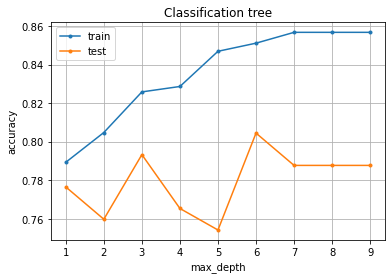

In [54]:
plot(depth, error_train_tree, error_test_tree, 'Classification tree')

#### Видим, что при глубине дерева 5 алгоритм показал наилучший результат. При последующией увелечении глубины дерева ошибка на тренировачных данных падает, а на тестовых растет, что свидетельствует о переобучении. Сделаем прогноз на основании дерева у которого оказалась максимальная точность на отложенной выборке.

In [55]:
tree_prediction = trees[5].predict(X_kaggle)

In [56]:
my_submission_tree = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': tree_prediction})
my_submission_tree.to_csv('submission_classification_tree.csv', index=False)
my_submission_tree.head()
# Score on Kaggle 0.77033

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


## Случайный лес

In [61]:
depth_forest = np.arange(5, 15)
error_train_forest = []
error_test_forest = []
forests = []
for i in depth_forest:
    forest = RF(max_depth=i, n_estimators = 50, min_size=10)
    
    forests.append(forest)
    forest.fit(X_train, y_train)
    
    prediction_train = forest.predict(X_train)
    prediction_test = forest.predict(X_test)
    
    error_train_forest.append(np.sum(prediction_train == y_train) / y_train.shape[0])
    error_test_forest.append(np.sum(prediction_test == y_test) / y_test.shape[0])

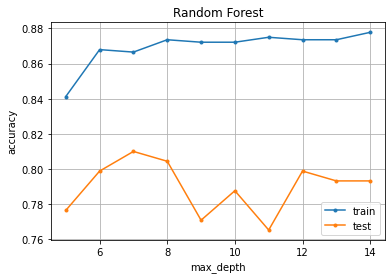

In [62]:
plot(depth_forest, error_train_forest, error_test_forest, 'Random Forest')

In [64]:
forest_prediction = trees[2].predict(X_kaggle)

In [65]:
my_submission_forest = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': forest_prediction})
my_submission_forest.to_csv('submission_classification_forest.csv', index=False)
my_submission_tree.head()
# Score on Kaggle 0.77990

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


## Градиентный бустинг над решающими деревьями

In [99]:
depth = np.arange(1, 10)
error_train_boosting = []
error_test_boosting = []
boosting = []

for i in depth:
    
    boost = GB(max_depth = i, n_estimators = 50, learning_rate = 0.1, min_size=10)
    
    boosting.append(boost)
    
    boost.fit(X_train, y_train)
    
    prediction_train = boost.predict(X_train)
    prediction_test = boost.predict(X_test)
    
    error_train_boosting.append(np.sum(prediction_train == y_train) / y_train.shape[0])
    error_test_boosting.append(np.sum(prediction_test == y_test) / y_test.shape[0])

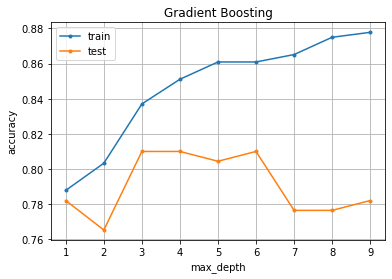

In [100]:
plt.plot(depth, error_train_boosting, label='train', marker='.')
plt.plot(depth, error_test_boosting, label='test', marker='.')
plt.title('Gradient Boosting')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [104]:
gb = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': boosting[2].predict(X_kaggle)})
gb.to_csv('gb.csv', index=False)
gb.head()
# Score on Kaggle 0.78708

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
